In [29]:
%pip install pyradiomics dicom_numpy pydicom plotly matplotlib scikit-image simpleITK pynrrd dicom2nifti NiBabel NiLearn openpyxl pydicom-seg itkwidgets

Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button, Slider
from matplotlib import patches, text, patheffects

import dicom_numpy
import pydicom as dicom

import dicom2nifti
import nibabel as nib
import nilearn as nil
import scipy.ndimage as ndi
import SimpleITK as sitk
import os

from radiomics import featureextractor

from tqdm import tqdm
import itertools
from functools import wraps

In [31]:
annotation_boxes = pd.read_excel("../../Simple Path Dataset/Annotation_Boxes.xlsx").set_index("Patient ID")



DATASET_PATH = '../../New Dataset/'

In [32]:
annotation_boxes

,Start Row,End Row,Start Column,End Column,Start Slice,End Slice
Patient ID,,,,,,
Breast_MRI_001,234,271,308,341,89,112
Breast_MRI_002,251,294,108,136,59,72
Breast_MRI_003,351,412,82,139,96,108
Breast_MRI_004,262,280,193,204,86,95
Breast_MRI_005,188,213,138,178,76,122
...,...,...,...,...,...,...
Breast_MRI_918,345,395,338,395,62,85
Breast_MRI_919,285,312,369,397,98,109
Breast_MRI_920,172,193,337,355,87,101


In [33]:
annotation_boxes.loc['Breast_MRI_001']

Start Row       234
End Row         271
Start Column    308
End Column      341
Start Slice      89
End Slice       112
Name: Breast_MRI_001, dtype: int64

In [34]:
# filenames = ['pre.nii.gz', 'post_1.nii.gz']

In [35]:
def relu(x):
    return np.maximum(x, 0)

Start Row       331
End Row         371
Start Column    408
End Column      434
Start Slice      39
End Slice        48
Name: Breast_MRI_006, dtype: int64
105


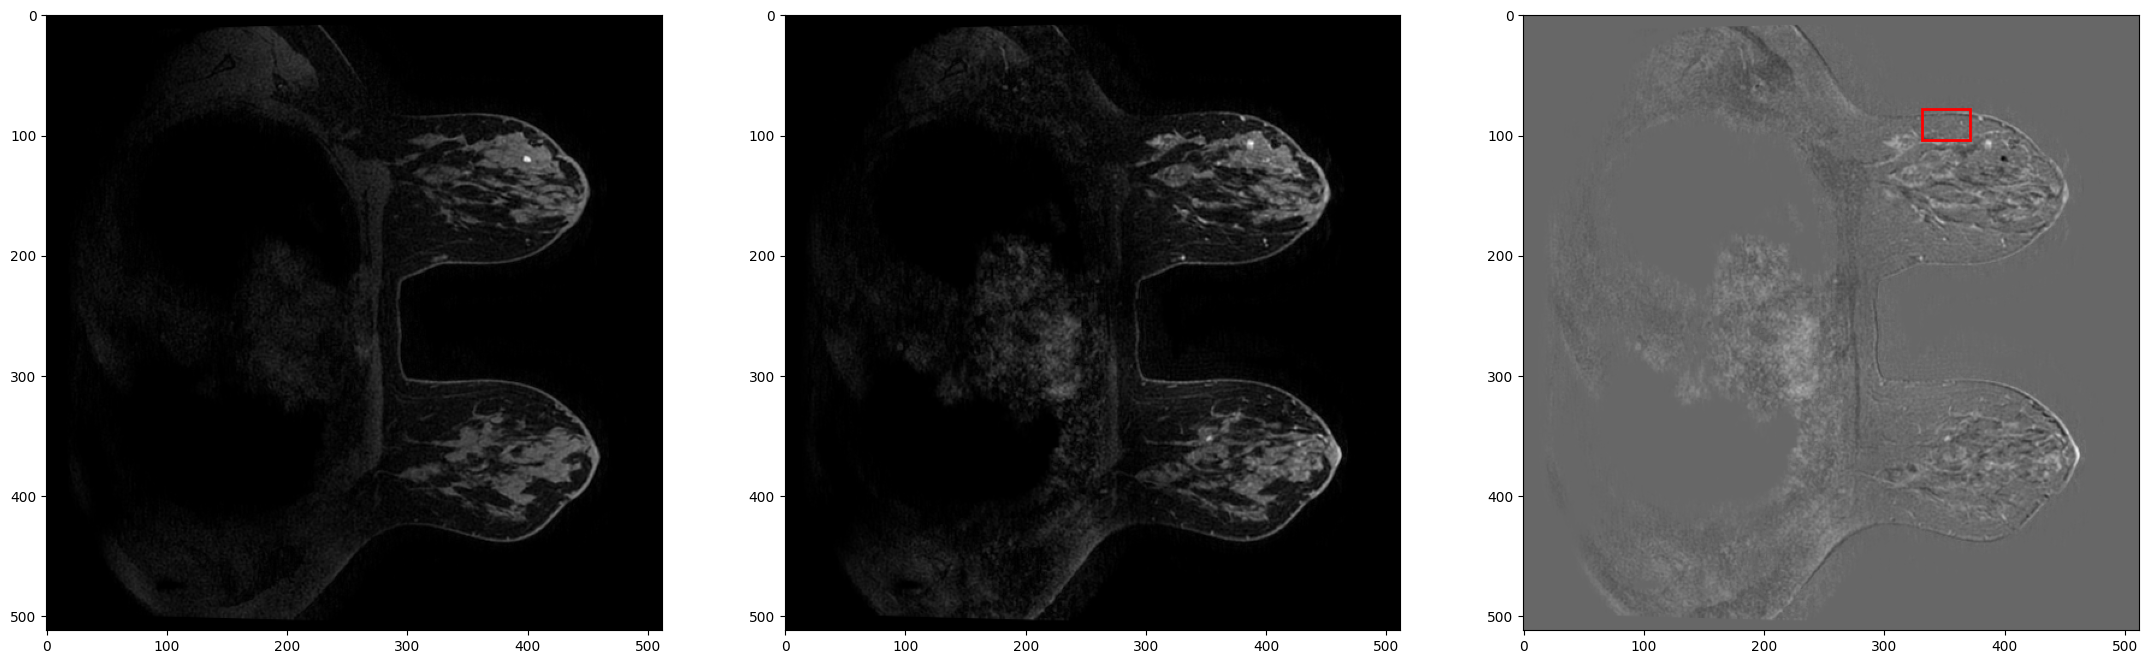

In [40]:
item = os.listdir(DATASET_PATH)[5]
# for item in tqdm(os.listdir(DATASET_PATH)):
patient_path = os.path.join(DATASET_PATH, item)

precontrast = nib.load(patient_path + '/pre.nii.gz')
postcontrast = nib.load(patient_path + '/post_1.nii.gz')

x = annotation_boxes.loc[item]
row1 = x['Start Row']
row2 = x['End Row']

col1 = x['Start Column']
col2 = x['End Column']

slice1 = x['Start Slice']
slice2 = x['End Slice']


height, width, depth = precontrast.shape
# row1, row2, col1, col2 = col1, col2, width - row2, width - row1         # row => column, column => width - row, slice => depth - slice
col1 = height - col1
col2 = height - col2
# slice1 = depth - slice1
# slice2 = depth - slice2

print(x)


precontrast_data = relu(precontrast.get_fdata())
postcontrast_data = relu(postcontrast.get_fdata())
diff_contrast = postcontrast_data - precontrast_data

fig, ax = plt.subplots(1, 3, figsize = (27, 9))

s = depth - (slice1 + slice2)//2                                     # num slices - current slice
# s = (slice1 + slice2)//2                                               # original
print(s)

ax[0].imshow(precontrast_data[:, :, s], cmap = 'gray')
ax[1].imshow(postcontrast_data[:, :, s], cmap = 'gray')
ax[2].imshow(diff_contrast[:, :, s], cmap = 'gray')


# ax[2].add_patch(patches.Rectangle((col1, row1), col2-col1, row2-row1, fill = False, edgecolor = 'red', lw = 2)) # original
ax[2].add_patch(patches.Rectangle((row1, col1), row2-row1,col2-col1, fill = False, edgecolor = 'red', lw = 2))  # changed